# Correlation Analysis between Stance, Emotional Intensity, and COVID-19 Cases
Understanding the relationship between public sentiment, emotional intensity, and the progression of the COVID-19
pandemic provides critical insights into how public health crises impact societal attitudes and emotions. To explore this,
we conducted a correlation analysis between the stance on mask-wearing, emotional intensity (fear, joy, anger), and daily
COVID-19 cases and deaths in both Thailand and the USA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
original = pd.read_csv('WHO-COVID-19-global-data.csv', parse_dates=['Date_reported'])
original

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
283447,2023-04-08,ZW,Zimbabwe,AFRO,2,264578,1,5684
283448,2023-04-09,ZW,Zimbabwe,AFRO,4,264582,0,5684
283449,2023-04-10,ZW,Zimbabwe,AFRO,2,264584,0,5684
283450,2023-04-11,ZW,Zimbabwe,AFRO,0,264584,0,5684


In [3]:
original.Country_code.unique()

array(['AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW',
       'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ',
       'BM', 'BT', 'BO', 'XA', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF',
       'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'KP',
       'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE',
       'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM',
       'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG',
       'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR',
       'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE',
       'KI', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI',
       'LT', 'LU', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR',
       'MU', 'YT', 'MX', 'FM', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM',
       nan, 'NR', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE

## For USA New Publishers Youtube Comments

In [4]:
original.drop(['Country', 'WHO_region'], axis=1, inplace=True)
# Filter the DataFrame
original = original[
                    (original['Country_code'] == 'US') & 
                    (original['Date_reported'] >= '2020-01-01') & 
                    (original['Date_reported'] <= '2022-12-31')].reset_index(drop=True)
original

,Date_reported,Country_code,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,US,0,0,0,0
1,2020-01-04,US,0,0,0,0
2,2020-01-05,US,0,0,0,0
3,2020-01-06,US,0,0,0,0
4,2020-01-07,US,0,0,0,0
...,...,...,...,...,...,...
1089,2022-12-27,US,0,99019493,0,1079976
1090,2022-12-28,US,0,99019493,0,1079976
1091,2022-12-29,US,0,99019493,0,1079976
1092,2022-12-30,US,392203,99411696,2480,1082456


In [5]:
stance_df = pd.read_csv('stance_emotion_us_mask.csv', parse_dates=['event_date'])[['event_date', 'fear_intensity', 'joy_intensity', 'anger_intensity', 'pred_stance']]

stance_df.set_index('event_date', inplace=True)
stance_df = stance_df[(stance_df.index >= '2020-01-01') & (stance_df.index <= '2022-12-31')]
stance_df['pred_stance'] = stance_df['pred_stance'].map({'Favorable': 1, 'Against': -1, 'Neutral': 0})
stance_df

,fear_intensity,joy_intensity,anger_intensity,pred_stance
event_date,,,,
2020-08-13,0.333,0.230,0.393,1
2020-06-26,0.562,0.200,0.562,1
2020-04-03,0.292,0.120,0.532,1
2021-04-27,0.438,0.250,0.438,0
2020-07-17,0.583,0.167,0.625,1
...,...,...,...,...
2020-09-02,0.333,0.233,0.562,-1
2021-09-23,0.438,0.320,0.433,-1
2022-04-08,0.479,0.271,0.479,1


In [6]:
merged_data = pd.merge(original, stance_df, how='left', left_on='Date_reported', right_index=True)
merged_data


,Date_reported,Country_code,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,fear_intensity,joy_intensity,anger_intensity,pred_stance
0,2020-01-03,US,0,0,0,0,NaN,NaN,NaN,NaN
1,2020-01-04,US,0,0,0,0,NaN,NaN,NaN,NaN
2,2020-01-05,US,0,0,0,0,NaN,NaN,NaN,NaN
3,2020-01-06,US,0,0,0,0,NaN,NaN,NaN,NaN
4,2020-01-07,US,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1090,2022-12-28,US,0,99019493,0,1079976,NaN,NaN,NaN,NaN
1091,2022-12-29,US,0,99019493,0,1079976,0.500,0.200,0.438,1.0
1091,2022-12-29,US,0,99019493,0,1079976,0.479,0.167,0.625,-1.0
1092,2022-12-30,US,392203,99411696,2480,1082456,NaN,NaN,NaN,NaN


In [7]:
filtered_data = merged_data.dropna(subset=['fear_intensity', 'joy_intensity', 'anger_intensity', 'pred_stance'])

In [8]:
# Prepare the data for OLS regression
X = filtered_data[['fear_intensity', 'joy_intensity', 'anger_intensity', 'pred_stance']]
y = filtered_data['New_cases']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

# Extract the p-value of pred_stance
p_value_pred_stance = model.pvalues['pred_stance']
print("P-value for pred_stance:", p_value_pred_stance)

                            OLS Regression Results                            
Dep. Variable:              New_cases   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.919
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           9.40e-05
Time:                        15:44:40   Log-Likelihood:            -1.2247e+05
No. Observations:                9138   AIC:                         2.450e+05
Df Residuals:                    9133   BIC:                         2.450e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            8.194e+04   1.58e+04     

The analysis shows that pred_stance significantly affects the number of new COVID-19 cases. The coefficient for pred_stance is -8163.6733, meaning a favorable stance on mask-wearing is associated with a decrease of approximately 8163 new cases compared to a neutral stance. The p-value of 0.000 indicates this effect is highly significant. However, the model’s R-squared value is very low (0.003), suggesting that the model explains only 0.3% of the variability in new cases, indicating that other factors not included in the model likely play a more significant role in explaining the variation in new cases.

In [9]:
# Prepare the data for OLS regression
X = filtered_data[['fear_intensity', 'joy_intensity', 'anger_intensity', 'pred_stance']]
y = filtered_data['New_deaths']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             New_deaths   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.486
Date:                Mon, 29 Jul 2024   Prob (F-statistic):            0.00127
Time:                        15:44:40   Log-Likelihood:                -74030.
No. Observations:                9138   AIC:                         1.481e+05
Df Residuals:                    9133   BIC:                         1.481e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             954.5202     78.945     

The analysis shows that fear_intensity and anger_intensity significantly affect the number of new COVID-19 deaths. The coefficient for fear_intensity is -248.2418, meaning higher fear intensity is associated with a decrease of approximately 248 new deaths, and this effect is statistically significant (p = 0.019). The coefficient for anger_intensity is 430.8695, indicating that higher anger intensity is associated with an increase of approximately 431 new deaths, and this effect is also statistically significant (p = 0.000). However, joy_intensity and pred_stance do not show significant effects. The model’s R-squared value is very low (0.002), suggesting that the model explains only 0.2% of the variability in new deaths, indicating that other factors not included in the model likely play a more significant role in explaining the variation in new deaths.

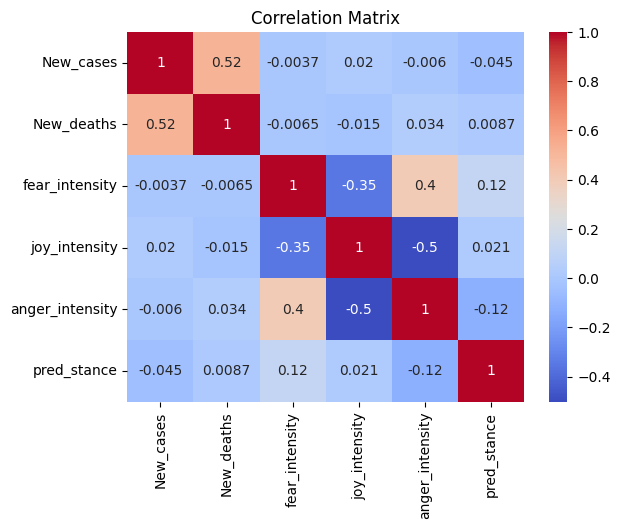

           feature        VIF
0            const  89.325516
1   fear_intensity   1.270635
2    joy_intensity   1.389396
3  anger_intensity   1.487424
4      pred_stance   1.049875
Durbin-Watson statistic: 0.01730054505124635
Breusch-Pagan test results: {'LM Statistic': 27.881134281488062, 'LM-Test p-value': 1.3184258201479895e-05, 'F-Statistic': 6.987790256805364, 'F-Test p-value': 1.2998602019950233e-05}
Shapiro-Wilk test results: ShapiroResult(statistic=0.45439514962722516, pvalue=2.2692585684431216e-97)


/Users/supakrit-a/.pyenv/versions/3.11.9/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9138.
  res = hypotest_fun_out(*samples, **kwds)


In [10]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
X = filtered_data[['fear_intensity', 'joy_intensity', 'anger_intensity', 'pred_stance']]
X = sm.add_constant(X)
y = filtered_data['New_cases']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Correlation Matrix
corr_matrix = filtered_data[['New_cases', 'New_deaths', 'fear_intensity', 'joy_intensity', 'anger_intensity', 'pred_stance']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Durbin-Watson Test
dw_stat = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw_stat}')

# Breusch-Pagan Test
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(labels, bp_test))
print('Breusch-Pagan test results:', bp_results)

# Shapiro-Wilk Test
shapiro_test = shapiro(model.resid)
print('Shapiro-Wilk test results:', shapiro_test)

## For Thailand New Publishers Youtube Comments

In [11]:
original = pd.read_csv('WHO-COVID-19-global-data.csv', parse_dates=['Date_reported'])
original.drop(['Country', 'WHO_region'], axis=1, inplace=True)
# Filter the DataFrame
original = original[
                    (original['Country_code'] == 'TH') & 
                    (original['Date_reported'] >= '2020-01-01') & 
                    (original['Date_reported'] <= '2022-12-31')].reset_index(drop=True)
original

,Date_reported,Country_code,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,TH,0,0,0,0
1,2020-01-04,TH,0,0,0,0
2,2020-01-05,TH,0,0,0,0
3,2020-01-06,TH,0,0,0,0
4,2020-01-07,TH,0,0,0,0
...,...,...,...,...,...,...
1089,2022-12-27,TH,0,4721808,0,33594
1090,2022-12-28,TH,0,4721808,0,33594
1091,2022-12-29,TH,0,4721808,0,33594
1092,2022-12-30,TH,0,4721808,0,33594


In [12]:
stance_df = pd.read_csv('../stance_emotion_th_mask.csv', parse_dates=['event_date'])[['event_date', 'fear_intensity', 'joy_intensity', 'anger_intensity', 'pred_stance']]

stance_df.set_index('event_date', inplace=True)
stance_df = stance_df[(stance_df.index >= '2020-01-01') & (stance_df.index <= '2022-12-31')]
stance_df['pred_stance'] = stance_df['pred_stance'].map({'Favorable': 1, 'Against': -1, 'Neutral': 0})
stance_df

,fear_intensity,joy_intensity,anger_intensity,pred_stance
event_date,,,,
2021-05-04,0.393,0.333,0.438,1
2021-02-03,0.479,0.271,0.438,1
2021-04-11,0.562,0.231,0.521,0
2021-07-30,0.292,0.292,0.292,1
2021-06-29,0.520,0.214,0.438,1
...,...,...,...,...
2021-04-26,0.396,0.220,0.438,0
2021-07-31,0.620,0.167,0.521,1
2021-04-26,0.333,0.214,0.396,0


In [13]:
merged_data = pd.merge(original, stance_df, how='left', left_on='Date_reported', right_index=True)
merged_data


,Date_reported,Country_code,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,fear_intensity,joy_intensity,anger_intensity,pred_stance
0,2020-01-03,TH,0,0,0,0,NaN,NaN,NaN,NaN
1,2020-01-04,TH,0,0,0,0,NaN,NaN,NaN,NaN
2,2020-01-05,TH,0,0,0,0,NaN,NaN,NaN,NaN
3,2020-01-06,TH,0,0,0,0,NaN,NaN,NaN,NaN
4,2020-01-07,TH,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1091,2022-12-29,TH,0,4721808,0,33594,NaN,NaN,NaN,NaN
1092,2022-12-30,TH,0,4721808,0,33594,0.438,0.292,0.438,0.0
1092,2022-12-30,TH,0,4721808,0,33594,0.438,0.292,0.438,1.0
1092,2022-12-30,TH,0,4721808,0,33594,0.396,0.292,0.438,0.0


In [14]:
filtered_data = merged_data.dropna(subset=['fear_intensity', 'joy_intensity', 'anger_intensity', 'pred_stance'])

In [15]:
# Prepare the data for OLS regression
X = filtered_data[['fear_intensity', 'joy_intensity', 'anger_intensity', 'pred_stance']]
y = filtered_data['New_cases']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

# Extract the p-value of pred_stance
p_value_pred_stance = model.pvalues['pred_stance']
print("P-value for pred_stance:", p_value_pred_stance)

                            OLS Regression Results                            
Dep. Variable:              New_cases   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.189
Date:                Mon, 29 Jul 2024   Prob (F-statistic):             0.0128
Time:                        15:44:40   Log-Likelihood:                -15647.
No. Observations:                1539   AIC:                         3.130e+04
Df Residuals:                    1534   BIC:                         3.133e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4044.1874   1740.865     

In [16]:
# Prepare the data for OLS regression
X = filtered_data[['fear_intensity', 'joy_intensity', 'anger_intensity', 'pred_stance']]
y = filtered_data['New_deaths']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             New_deaths   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.782
Date:                Mon, 29 Jul 2024   Prob (F-statistic):              0.130
Time:                        15:44:40   Log-Likelihood:                -8033.8
No. Observations:                1539   AIC:                         1.608e+04
Df Residuals:                    1534   BIC:                         1.610e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              26.1741     12.373     

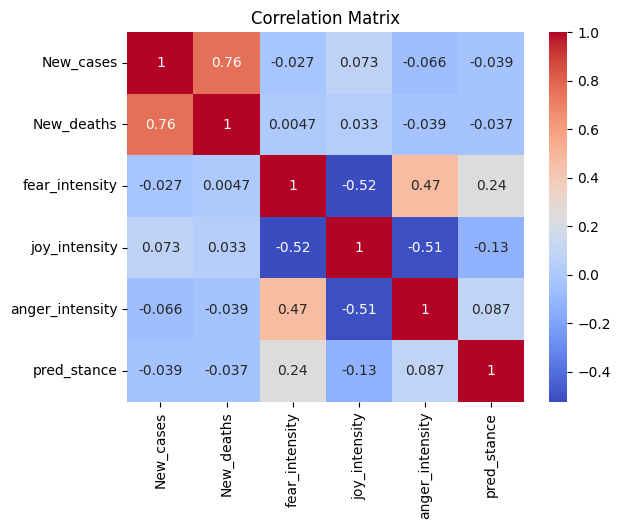

           feature         VIF
0            const  117.245139
1   fear_intensity    1.565982
2    joy_intensity    1.569169
3  anger_intensity    1.464315
4      pred_stance    1.065070
Durbin-Watson statistic: 0.024755866383582174
Breusch-Pagan test results: {'LM Statistic': 7.599235240711369, 'LM-Test p-value': 0.10741221517484872, 'F-Statistic': 1.9030333416810743, 'F-Test p-value': 0.10745389015098776}
Shapiro-Wilk test results: ShapiroResult(statistic=0.7228071398555539, pvalue=8.11342640752872e-45)


In [17]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
X = filtered_data[['fear_intensity', 'joy_intensity', 'anger_intensity', 'pred_stance']]
X = sm.add_constant(X)
y = filtered_data['New_cases']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Correlation Matrix
corr_matrix = filtered_data[['New_cases', 'New_deaths', 'fear_intensity', 'joy_intensity', 'anger_intensity', 'pred_stance']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Durbin-Watson Test
dw_stat = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw_stat}')

# Breusch-Pagan Test
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(labels, bp_test))
print('Breusch-Pagan test results:', bp_results)

# Shapiro-Wilk Test
shapiro_test = shapiro(model.resid)
print('Shapiro-Wilk test results:', shapiro_test)